# Self Organizing Map:
A unsupervised Techniques used for Feature detection

In [1]:
# Import the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [2]:
# Import the dataset

dataset = pd.read_csv('Credit_Card_Applications.csv')
dataset.head()


,CustomerID,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,Class
0,15776156,1,22.08,11.46,2,4,4,1.585,0,0,0,1,2,100,1213,0
1,15739548,0,22.67,7.00,2,8,4,0.165,0,0,0,0,2,160,1,0
2,15662854,0,29.58,1.75,1,4,4,1.250,0,0,0,1,2,280,1,0
3,15687688,0,21.67,11.50,1,5,3,0.000,1,1,11,1,2,0,1,1
4,15715750,1,20.17,8.17,2,6,4,1.960,1,1,14,0,2,60,159,1


### Corelation Matrix:

In [3]:
dataset.corr()

,CustomerID,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,Class
CustomerID,1.000000,-0.017669,0.001531,0.048405,0.071517,-0.053314,-0.056552,0.055084,0.041009,0.019781,-0.006900,-0.002839,0.015464,-0.020295,0.040060,0.035400
A1,-0.017669,1.000000,0.036659,-0.028166,-0.063528,-0.005321,0.052658,0.097009,0.000918,-0.063256,-0.008427,0.053984,-0.059901,0.058595,0.003616,-0.013897
A2,0.001531,0.036659,1.000000,0.201315,0.089503,-0.093877,0.028510,0.392788,0.204342,0.083680,0.185574,0.054779,0.020703,-0.077159,0.018539,0.161626
A3,0.048405,-0.028166,0.201315,1.000000,0.091526,0.027665,0.094504,0.298902,0.244317,0.174846,0.271207,-0.013023,0.093752,-0.222346,0.123121,0.206294
A4,0.071517,-0.063528,0.089503,0.091526,1.000000,0.088846,0.046639,0.080624,0.129863,0.162464,0.106457,0.004964,0.006400,-0.001758,0.120065,0.194306
A5,-0.053314,-0.005321,-0.093877,0.027665,0.088846,1.000000,0.402284,0.144757,0.311833,0.222957,0.150166,0.024738,0.070222,0.088140,0.030735,0.373712
A6,-0.056552,0.052658,0.028510,0.094504,0.046639,0.402284,1.000000,0.240400,0.246193,0.080397,0.098841,0.093641,0.036435,0.070662,0.064841,0.246567
A7,0.055084,0.097009,0.392788,0.298902,0.080624,0.144757,0.240400,1.000000,0.345689,0.222982,0.322330,0.138139,-0.016297,-0.076389,0.051345,0.322475
A8,0.041009,0.000918,0.204342,0.244317,0.129863,0.311833,0.246193,0.345689,1.000000,0.432032,0.379532,0.091276,0.045054,-0.067387,0.090012,0.720407
A9,0.019781,-0.063256,0.083680,0.174846,0.162464,0.222957,0.080397,0.222982,0.432032,1.000000,0.571498,0.017043,0.176097,-0.053321,0.077652,0.458301


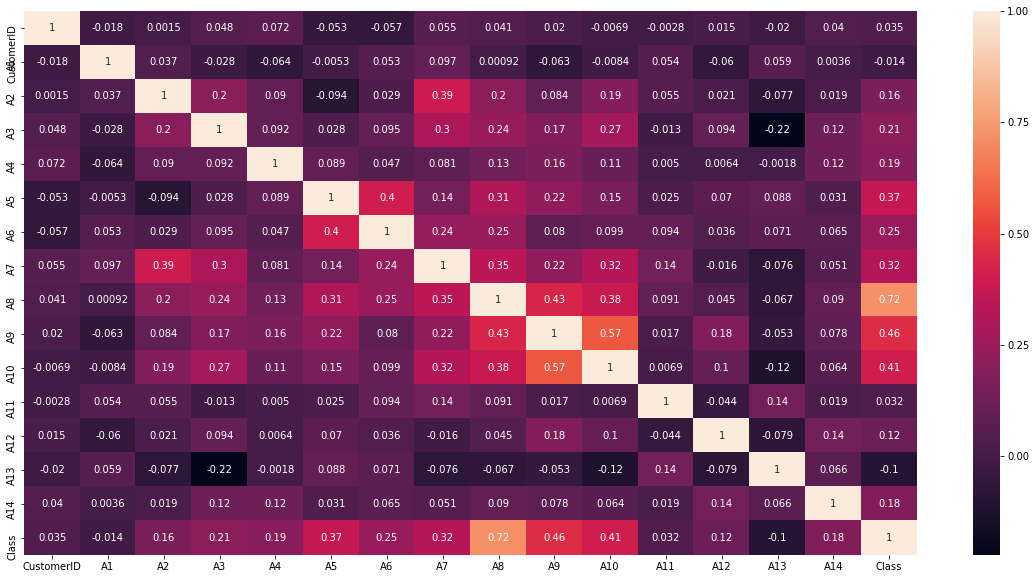

In [4]:
import seaborn
plt.figure(figsize=(20,10)) 
seaborn.heatmap(dataset.corr(),annot=True)

there is a high correlation value between A8 feature and the final outcome.

In [5]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [6]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

In [7]:
# import the Self Organizing Map
from minisom import MiniSom

In [8]:
# Training the Self Organizing Map
som = MiniSom(x = 10, y = 10, input_len = 15, sigma = 1.0, learning_rate = 0.5)

som.random_weights_init (X)
som.train_random(data = X, num_iteration = 100)

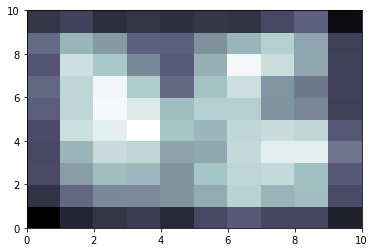

In [9]:
# Visualizing the results
from pylab import bone, pcolor, colorbar, plot, show
bone()
pcolor(som.distance_map().T)
plt.show()

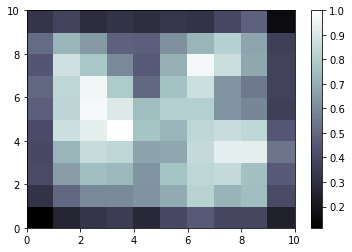

In [10]:
# colorbar
bone()
pcolor(som.distance_map().T)
colorbar()
plt.show()

In [11]:
markers = ['o', 's']
colors = ['r', 'g']


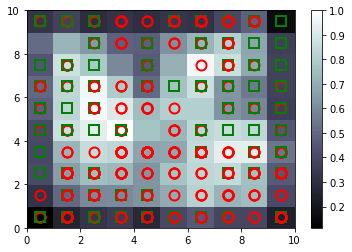

In [12]:
bone()
pcolor(som.distance_map().T)
colorbar()
for i, x in enumerate(X):
    w = som.winner(x)
    plot(w[0] + 0.5,
         w[1] + 0.5,
         markers[y[i]],
         markeredgecolor = colors[y[i]],
         markerfacecolor = 'None',
         markersize = 10,
         markeredgewidth = 2)
show()

In [13]:
# Find the frauds
mappings = som.win_map(X)


In [14]:
frauds = np.concatenate((mappings[(8,1)], mappings[(6,8)]), axis = 0)
frauds

array([[-0.28607711, -1.45193254, -1.23669044, -0.8561017 ,  0.54294996,
        -1.18797749, -0.34796495, -0.61553587, -1.04750391,  1.15714435,
         0.74082993,  1.08790822,  0.23782765,  0.32543191, -0.18869075],
       [ 1.0231451 , -1.45193254, -1.31436244, -0.92344441,  0.54294996,
        -0.37289184, -0.34796495, -0.36584145, -1.04750391,  1.15714435,
        -0.08231444,  1.08790822,  0.23782765,  0.79045498, -0.19522126],
       [-1.45535039, -1.45193254, -0.36456897, -0.89831654,  0.54294996,
        -0.10119662,  1.66120506, -0.62749728, -1.04750391,  1.15714435,
        -0.28810053,  1.08790822,  0.23782765,  0.51144113, -0.17466934],
       [-0.18695128,  0.68873723, -0.32235593, -0.83901474, -1.78397845,
         1.52897468, -0.34796495, -0.59011788,  0.95465038,  1.15714435,
        -0.08231444, -0.91919518,  0.23782765,  0.44168767, -0.09937632],
       [-1.44390256,  0.68873723, -1.11005131,  1.13704157, -1.78397845,
        -0.37289184, -0.34796495, -0.62749728, 

In [15]:
frauds = sc.inverse_transform(frauds)

In [16]:
frauds

array([[1.5670029e+07, 0.0000000e+00, 1.6920000e+01, 5.0000000e-01,
        2.0000000e+00, 3.0000000e+00, 4.0000000e+00, 1.6500000e-01,
        0.0000000e+00, 1.0000000e+00, 6.0000000e+00, 1.0000000e+00,
        2.0000000e+00, 2.4000000e+02, 3.6000000e+01],
       [1.5763579e+07, 0.0000000e+00, 1.6000000e+01, 1.6500000e-01,
        2.0000000e+00, 6.0000000e+00, 4.0000000e+00, 1.0000000e+00,
        0.0000000e+00, 1.0000000e+00, 2.0000000e+00, 1.0000000e+00,
        2.0000000e+00, 3.2000000e+02, 2.0000000e+00],
       [1.5586479e+07, 0.0000000e+00, 2.7250000e+01, 2.9000000e-01,
        2.0000000e+00, 7.0000000e+00, 8.0000000e+00, 1.2500000e-01,
        0.0000000e+00, 1.0000000e+00, 1.0000000e+00, 1.0000000e+00,
        2.0000000e+00, 2.7200000e+02, 1.0900000e+02],
       [1.5677112e+07, 1.0000000e+00, 2.7750000e+01, 5.8500000e-01,
        1.0000000e+00, 1.3000000e+01, 4.0000000e+00, 2.5000000e-01,
        1.0000000e+00, 1.0000000e+00, 2.0000000e+00, 0.0000000e+00,
        2.0000000e+00,